# Statistical and spectral analysis of TS

In [1]:
import numpy as np
import numpy.random as rand
import seaborn as sbr
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


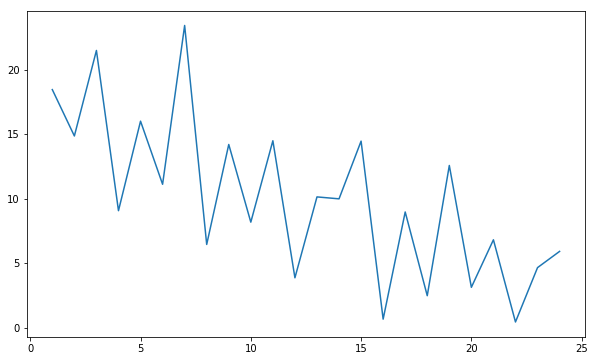

In [2]:
A = np.array([18.47, 14.87, 21.51, 9.07, 16.02, 11.12, 23.45, 6.45, 14.21, 8.18, 14.50, 3.86, 10.14, 9.99, 14.47, 0.65,
              8.97, 2.47, 12.58, 3.12, 6.81, 0.43, 4.65, 5.91]) #random time series
t = np.linspace(1, 24, num=24)

plt.figure(figsize=(10, 6))
plt.plot(t,A)

In [3]:
mean = np.mean(A)
dispersion = np.var(A)
print('mean = ', mean, '\n', 'dispersion = ', dispersion)

mean =  10.079166666666667 
 dispersion =  37.705232638888894


In [4]:
def autocorr(arr):
    res = np.correlate(arr, arr, mode = 'full')
    return res[res.size // 2:]

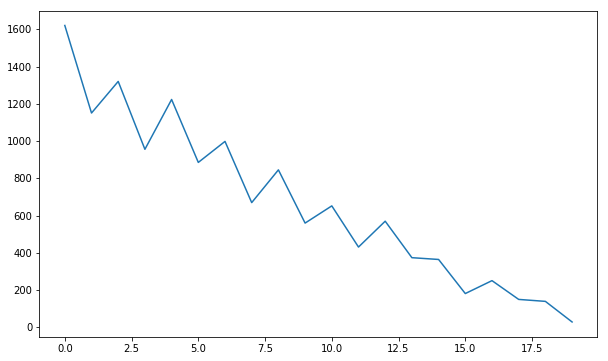

In [5]:
Xc = A[0:20]
Xc = autocorr(Xc)
Xc = (Xc + 1) / (1 + 1)

plt.figure(figsize=(10, 6))
plt.plot(Xc)

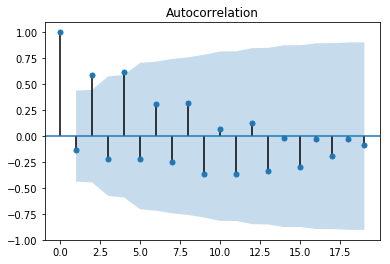

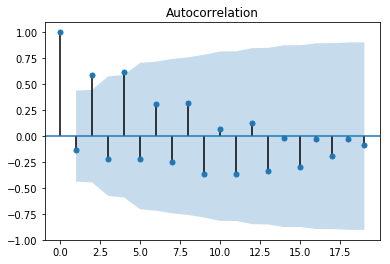

In [6]:
plot_acf(A[0:20])

C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


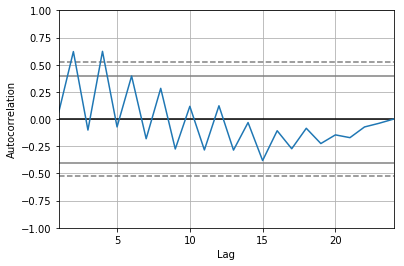

In [7]:
autocorrelation_plot(A)

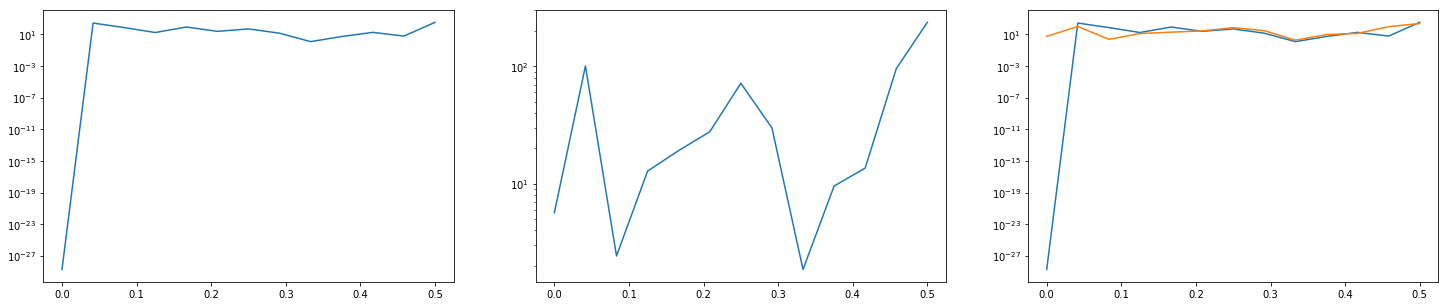

In [8]:
f, Pxx_den = signal.periodogram(A)
f1, Pxx_den1 = signal.welch(A, nperseg=24)

plt.figure(figsize = (25,5))
plt.subplot(1, 3, 1)
plt.semilogy(f, Pxx_den)
plt.subplot(1, 3, 2)
plt.semilogy(f1, Pxx_den1)
plt.subplot(1, 3, 3)
plt.semilogy(f, Pxx_den)
plt.semilogy(f1, Pxx_den1)

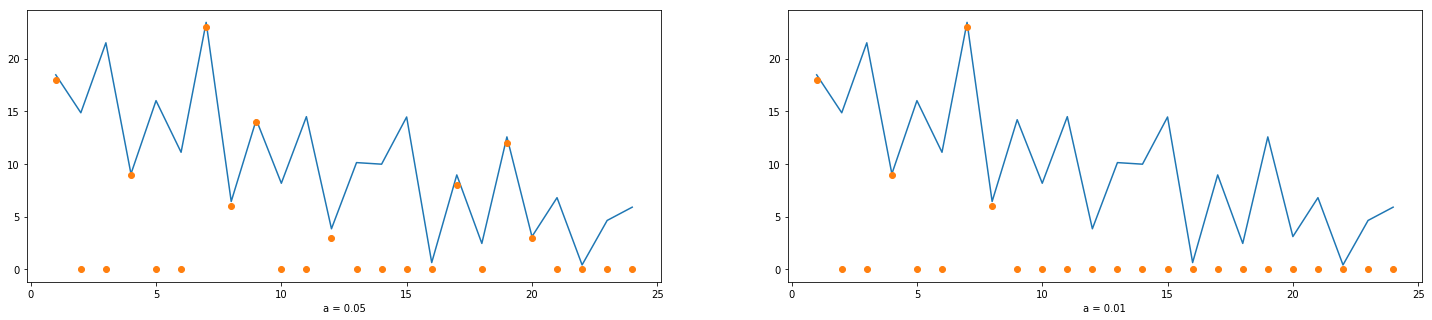

In [9]:
#Irwin method
N = A.size
bk = 1.23
bk2 = 1.74
C = np.zeros((24,), dtype=int)
B = np.zeros((24,), dtype=int)
for i in range(0, N-1):
    sigma = np.sqrt((np.sum(A[i] - mean) * (np.sum(A[i] - mean)) / (N - 1)))
    k = np.abs(A[i] - A[i - 1]) / np.std(A)
    if k > bk:
        C[i] = A[i]
        if k > bk2:
            B[i] = A[i]

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt.xlabel('a = 0.05') 
plt.plot(t,A)
plt.plot(t,C, 'o')
plt.subplot(1, 2, 2)
plt.xlabel('a = 0.01') 
plt.plot(t,A)
plt.plot(t,B, 'o')
plt.show()

Альтернативная гипотеза о неслучайности ряда принимается
Series:  [1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


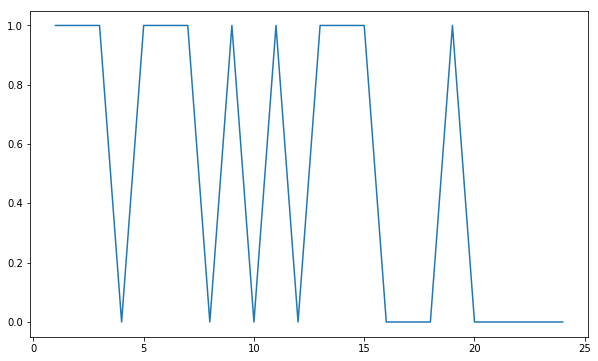

In [15]:
#Series criterion
As = np.sort(A)
xmed = np.median(As)
n = 0
D = np.zeros(24)
for i in range(0, N - 1):
    if A[i] > xmed:
        D[n] = 1
        n = n + 1
    if A[i] < xmed:
        D[n] = 0
        n = n + 1
N1 = D.size
v1 = 0
if D[0] == 1:
    v = 0
    count = 0
    maxcount = 0
    trigger = 1
    posttrigger = 0
    for i in range(0, N1 - 1):
        count = count + 1
        if D[i] == posttrigger:
            if D[i + 1] == trigger:
                v = v + 1
            if count > maxcount:
                maxcount = count
                count = 0
            else :
                count = 0
v = v + 1
if v > 0.5 * (N1 + 2 - 1.96 * np.sqrt(N1 - 1)):
    if maxcount < 1.43 * np.log(N1 + 1):
        print('Нулевая гипотеза о неслучайности ряда принимается')
else:
    print('Альтернативная гипотеза о неслучайности ряда принимается')
    
print('Series: ', D)

plt.figure(figsize=(10, 6))
plt.plot(t, D)

In [16]:
#Stationarity test
split = np.int(A.size / 2)
A1 = A[0:split]
A2 = A[split + 1:A.size]
KPSS = tsa.kpss(A)
Fish = stats.f_oneway(A1, A2)
Student = 0
if Fish == 0:
    mean1 = np.mean(A1)
    dispersion1 = np.var(A1)
    N1 = A1.size
    mean2 = np.mean(A2)
    dispersion2 = np.var(A2)
    N2 = A2.size
    pt1 = mean1 - mean2
    pt2 = ((N1 - 1) * dispersion1) + ((N2 - 1) * dispersion2)
    pt3 = N1 * N2 * (N1 + N2 - 2)
    pt4 = N1 + N2
    Ks = (pt1 / sqrt(pt2)) * sqrt(pt3 / pt4)
    frS = stats.tinv(0.99, N1 + N2 - 2)
    if Ks > frS:
        Student = 1
    else:
        Student = 0

In [17]:
if int(KPSS[0]) == 0:
    print('Временной ряд является стационарным по КПСС-тесту')
else:
    print('Временной ряд не является стационарным по КПСС-тесту')
if int(Fish[0]) == 0 & Student == 0:
    print('Временной ряд является стационарным по критерию Фишера и Стьюдента')
else:
    print('Временной ряд не является стационарным по критерию Фишера и Стьюдента')

Временной ряд является стационарным по КПСС-тесту
Временной ряд не является стационарным по критерию Фишера и Стьюдента
